# Plot ML GASP predictions

## Imports and setup

In [10]:
from pathlib import Path
import shelve

import matplotlib.pyplot as plt

from ml_gasp.train_model import plot_predictions


In [51]:
system = "Si_C"
ml_run = "formationenergy_SVR_80"
savefile = f"/blue/subhash/salil.bavdekar/GASP/{system}/garun_phase_diag/ml_run_data/{ml_run}"
with shelve.open(savefile) as db:
    y_train = db["y_train"]
    y_pred_train = db["y_pred_train"]
    y_test = db["y_test"]
    y_pred_test = db["y_pred_test"]

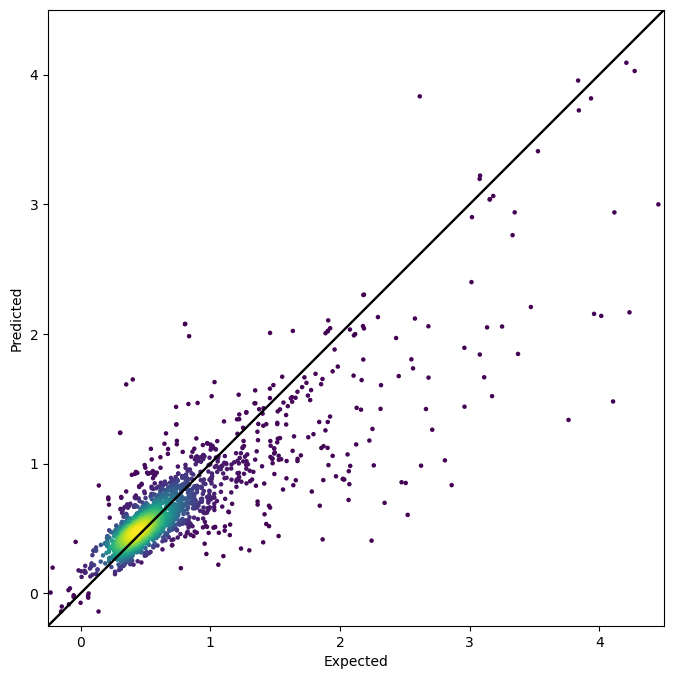

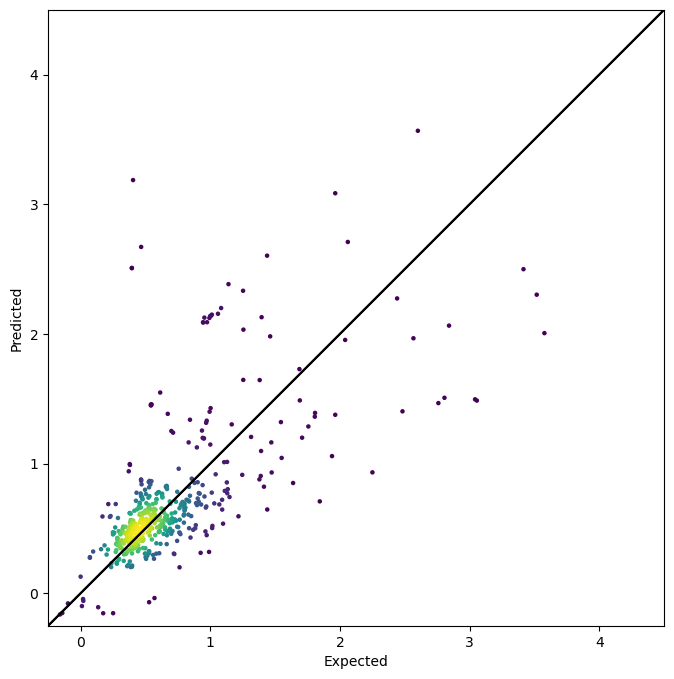

In [52]:
fig_train, ax_train = plot_predictions(y_train, y_pred_train)
fig_test, ax_test = plot_predictions(y_test, y_pred_test)

if ml_run.split("_")[0] == "energyperatom":
    lims = [-9, -1]
elif ml_run.split("_")[0] == "formationenergy":
    lims = [-0.25, 4.5]
elif ml_run.split("_")[0] == "hardness":
    lims = [0, 50]

line_45 = [-100, 100]  # 45 degree line
for ax in [ax_train, ax_test]:
    ax.plot(line_45, line_45, "k")
    ax.set_xlim(lims)
    ax.set_ylim(lims)
